In [94]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Define your model, optimizer, and data loader
model = nn.Sequential(nn.Flatten(), nn.Linear(28*28, 128), nn.ReLU(), nn.Linear(128, 10))
model.to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05)
train_loader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=128,
    shuffle=True
)

test_loader = DataLoader(
    datasets.MNIST('.', train=False, download=True, transform=transforms.ToTensor()),
    batch_size=128,
    shuffle=True
)



In [95]:
# Training loop
for epoch in range(20):
    for data, target in tqdm(train_loader):
        data = data.to(device)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.functional.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
    with torch.no_grad():
      accuracy = 0
      for data, target in tqdm(test_loader):
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        preds = torch.argmax(output,1)
        accuracy += torch.sum(preds == target)
      print(f"Accuracy: {accuracy/len(test_loader.dataset)}")





  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.8984999656677246


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9145999550819397


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9226999878883362


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9311999678611755


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9352999925613403


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.939799964427948


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9426999688148499


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9454999566078186


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9501000046730042


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9515999555587769


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9541999697685242


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9564999938011169


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9590999484062195


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9599999785423279


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.961899995803833


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9631999731063843


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9642999768257141


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9649999737739563


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9663999676704407


  0%|          | 0/469 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Accuracy: 0.9672999978065491


In [96]:
# Now get Scores
train_loader = DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transforms.ToTensor()),
    batch_size=1,
    shuffle=True
)

test_loader = DataLoader(
    datasets.MNIST('.', train=False, download=True, transform=transforms.ToTensor()),
    batch_size=1,
    shuffle=True
)

scoresIn = []
scoresOut = []
scores = []
model.to('cpu')
with torch.no_grad():
  for data, target in tqdm(train_loader):

    output = model(data)
    loss = nn.functional.cross_entropy(output, target)
    scoresIn.append(loss.item())

  # did not train on these
  for data, target in tqdm(test_loader):
    output = model(data)
    loss = nn.functional.cross_entropy(output, target)
    scoresOut.append(loss.item())

scores = scoresIn
scores.extend(scoresOut)
scoresdf = pd.DataFrame({'scores' : scores})

  0%|          | 0/60000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [97]:
scoresdf['train'] = scoresdf.index.isin(range(len(train_loader)))

Text(0.5, 0, 'Index')

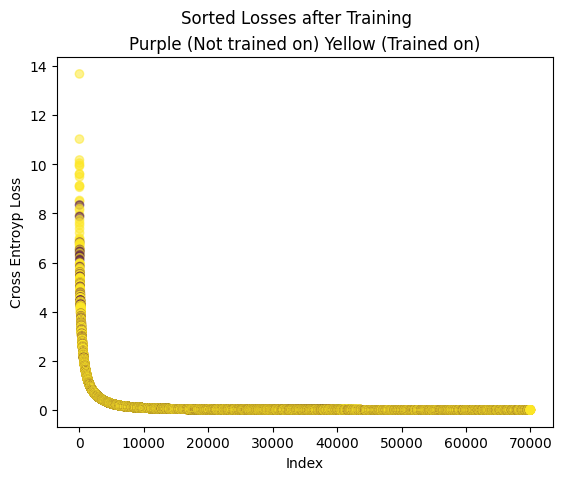

In [129]:
import matplotlib.pyplot as plt

scores_sorted = scoresdf.sort_values('scores', ascending = False).reset_index()
plt.scatter(scores_sorted.index, scores_sorted['scores'],
            c = scores_sorted['train'], alpha = 0.5)
plt.suptitle("Sorted Losses after Training")
plt.title("Purple (Not trained on) Yellow (Trained on)")
plt.ylabel("Cross Entroyp Loss")
plt.xlabel("Index")

In [128]:
changing_quickly = np.abs(scores_sorted['scores'].diff(10)[1:]) < np.median(scores_sorted['scores'][1:])
changing_quickly = pd.Series(np.where(changing_quickly == False, None, changing_quickly))
r = changing_quickly.first_valid_index()